In [298]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from urllib.parse import urlparse, urljoin

In [299]:
def is_valid(url):
    parsed = urlparse(url)
    return bool(parsed.netloc) and bool(parsed.scheme)

In [300]:
def get_all_website_links(url):
    global internal_urls
    urls = set()

    domain_name = urlparse(url).netloc
    soup = BeautifulSoup(requests.get(url).content, "html.parser")
    for a_tag in soup.findAll("a"):
        href = a_tag.attrs.get("href")
        if href == "" or href is None:
            continue
            
        href = urljoin(url, href)
        parsed_href = urlparse(href)
        # remove URL GET parameters, URL fragments, etc.
        href = parsed_href.scheme + "://" + parsed_href.netloc + parsed_href.path

        if not is_valid(href):
            # not a valid URL
            continue
        if href in internal_urls:
            # already in the set
            continue
        if domain_name not in href:
            continue
            
        print(f"[*] Internal link: {href}")
        urls.add(href)
        internal_urls.add(href)
        
    return urls

In [301]:
import networkx as nx

root_url = "https://www.matburo.ru" #"http://www.techwithtim.net" 
# root_url = 'https://www.tabnine.com/welcome/'
graph = nx.Graph()
graph.add_node(root_url)
df = pd.DataFrame(columns=['url','pagerank'])
total_urls_visited = 0
internal_urls = set()

def crawl(url, max_urls=30):
    global total_urls_visited
    global graph
    global df
    
    total_urls_visited += 1
    links = get_all_website_links(url)
    
    for link in links:
        graph.add_node(link)
        graph.add_edge(url,link)
        
        if total_urls_visited > max_urls:
            break
        crawl(link, max_urls=max_urls)
        
    pagerank = nx.pagerank_numpy(graph, alpha=0.85, personalization=None,  weight='weight', dangling=None)
    df = pd.concat([df, pd.DataFrame([[url, pagerank.get(url)]],columns=['url','pagerank'])])  

crawl(root_url)
print("[+] Total Internal links:", len(internal_urls))

[*] Internal link: https://www.matburo.ru/
[*] Internal link: https://www.matburo.ru/order_express.php
[*] Internal link: https://www.matburo.ru/sub_appear.php
[*] Internal link: https://www.matburo.ru/app_conditions.php
[*] Internal link: https://www.matburo.ru/gb.php
[*] Internal link: https://www.matburo.ru/order.php
[*] Internal link: https://www.matburo.ru/prices.php
[*] Internal link: https://www.matburo.ru/faq.php
[*] Internal link: https://www.matburo.ru/mprofi.php
[*] Internal link: https://www.matburo.ru/subjects.php
[*] Internal link: https://www.matburo.ru/online.php
[*] Internal link: https://www.matburo.ru/sub_online.php
[*] Internal link: https://www.matburo.ru/appear.php
[*] Internal link: https://www.matburo.ru/useful.php
[*] Internal link: https://www.matburo.ru/examples.php
[*] Internal link: https://www.matburo.ru/st_subject.php
[*] Internal link: https://www.matburo.ru/stuff.php
[*] Internal link: https://www.matburo.ru/math_articles.php
[*] Internal link: https://

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


[*] Internal link: https://www.matburo.ru/tv/resh.png


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


[*] Internal link: https://www.matburo.ru/lk.php
[*] Internal link: https://www.matburo.ru/images/lk/lk6.png


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


[*] Internal link: https://www.matburo.ru/order_exam.php
[*] Internal link: https://www.matburo.ru/oferta.php
[*] Internal link: https://www.matburo.ru/tvart_sub.php
[*] Internal link: https://www.matburo.ru/mor_book.php
[*] Internal link: https://www.matburo.ru/ex_ma.php
[+] Total Internal links: 58


In [302]:
import matplotlib
import matplotlib.pyplot as plt

def draw_graph(g):
    pagerank = nx.pagerank_numpy(g, alpha=0.85, personalization=None,  weight='weight', dangling=None)
    nodesize=[g.degree(n)*85 for n in g]
    pos=nx.spring_layout(g,iterations=20)
    
    nx.draw(g,with_labels=False,font_weight='bold')
    nx.draw_networkx_nodes(g,pos,node_size=nodesize,node_color='r')
    #nx.draw_networkx_labels(graph,pos=nx.spring_layout(graph))
    nx.draw_networkx_edges(g,pos)
    plt.figure(figsize=(7,5))
    plt.show()

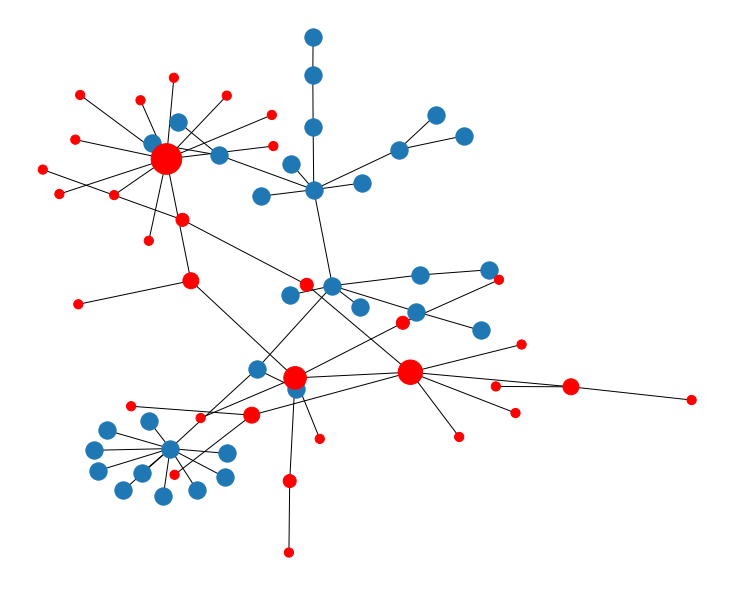

<Figure size 504x360 with 0 Axes>

In [303]:
plt.figure(figsize=(10,8))
draw_graph(graph)

In [304]:
# БИБЛИОТЕЧНЫЙ РАСЧЕТ РАНГОВ
pagerank = nx.pagerank_numpy(graph, alpha=0.85, personalization=None,  weight='weight', dangling=None)
df

,url,pagerank
0,https://www.matburo.ru/howtopay_most.php,0.175439
0,https://www.matburo.ru/howtopay.php,0.324561
0,https://www.matburo.ru/appear/ex_1_i.png,0.092822
0,https://www.matburo.ru/appear/ex_2_m.png,0.077767
0,https://www.matburo.ru/appear/ex_4_m.png,0.067296
0,https://www.matburo.ru/appear/ex_1_m.png,0.059472
0,https://www.matburo.ru/appear/ex_3_m.png,0.053357
0,https://www.matburo.ru/appear/ex_4_i.png,0.048425
0,https://www.matburo.ru/appear/ex_3_i.png,0.044351
0,https://www.matburo.ru/appear/ex_5_i.png,0.040925


In [305]:
def PR(graph, d=0.5, prs={}): 
    if not prs:
        keys = list(graph.nodes())
        values = [1 for i in graph.nodes()]

        for key in keys: 
            for value in values: 
                prs[key] = value 
                values.remove(value) 
                break 
                
    # АЛГОРИТМ РАНЖИРОВАВАНИЯ
    for g in list(graph.nodes()):
        prs[g] = (1-d) + d * sum([prs[Ti[1]]/len(graph.edges(Ti[1])) for Ti in list(graph.edges(g))]) 
        
    return prs


In [306]:
# МЕТОД ЯКОБИ
prs = {}
for i in range(100):
    prs = PR(graph, prs=prs)
    
prs

{'https://www.matburo.ru': 2.3844561771581123,
 'https://www.matburo.ru/prices.php': 2.072265497598968,
 'https://www.matburo.ru/howtopay.php': 1.0545014759618065,
 'https://www.matburo.ru/howtopay_most.php': 0.7636253689904516,
 'https://www.matburo.ru/app_examples.php': 1.2120460186982835,
 'https://www.matburo.ru/app_compare.php': 4.143774631483943,
 'https://www.matburo.ru/appear/ex_1_i.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_2_m.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_4_m.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_1_m.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_3_m.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_4_i.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_3_i.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_5_i.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_2_i.png': 0.6883533923401792,
 'https://www.matburo.ru/appear/ex_5_m.png': 0.6883533923401

In [307]:
print(f'Amount of inner pages: {len(pagerank)}\n')
print(f'Result of PR convergence: {sum(v[1] for v in prs.items())}\n')

Amount of inner pages: 33

Result of PR convergence: 32.99999999999999



In [308]:
def normalize(prs):
    amin, amax = min([v[1] for v in prs.items()]), max([v[1] for v in prs.items()])
    for key, val in prs.items():
        prs[key] = (val-amin) / (amax-amin)
        
    return prs

In [309]:
prs = {k: v for k, v in reversed(sorted(prs.items(), key=lambda item: item[1]))}

show = pd.DataFrame.from_dict(prs,orient='index',columns=['Rank'])
show.iloc[:10]

,Rank
https://www.matburo.ru/app_compare.php,4.143775
https://www.matburo.ru,2.384456
https://www.matburo.ru/prices.php,2.072265
https://www.matburo.ru/math_articles.php,1.404382
https://www.matburo.ru/order_express.php,1.404382
https://www.matburo.ru/app_examples.php,1.212046
https://www.matburo.ru/lk.php,1.129329
https://www.matburo.ru/tv_resh.php,1.054501
https://www.matburo.ru/howtopay.php,1.054501
https://www.matburo.ru/mprofi.php,0.952650
